# Customer Segmentation Dataset

## Importing of Libraries

In [65]:
# Import libraries and mount drive
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import sklearn as sks
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Data Cleaning

In [66]:
# Load the dataset
customer = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/cust_seg.csv')
customer.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [67]:
# Check the information
customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       850 non-null    int64  
 1   Customer Id      850 non-null    int64  
 2   Age              850 non-null    int64  
 3   Edu              850 non-null    int64  
 4   Years Employed   850 non-null    int64  
 5   Income           850 non-null    int64  
 6   Card Debt        850 non-null    float64
 7   Other Debt       850 non-null    float64
 8   Defaulted        700 non-null    float64
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 66.5 KB


In [68]:
# Check the value counts
for item in customer.columns.to_list():
  print(customer[item].value_counts())

849    1
291    1
289    1
288    1
287    1
      ..
563    1
562    1
561    1
560    1
0      1
Name: Unnamed: 0, Length: 850, dtype: int64
850    1
292    1
290    1
289    1
288    1
      ..
564    1
563    1
562    1
561    1
1      1
Name: Customer Id, Length: 850, dtype: int64
29    51
31    42
39    41
35    40
28    38
34    38
41    36
27    33
36    33
40    32
33    31
37    31
24    30
26    30
30    30
32    30
38    30
25    25
43    22
47    22
23    21
45    21
48    19
46    18
42    16
44    15
22    14
21    12
50    11
52     9
51     7
53     7
49     5
54     4
56     2
55     2
20     2
Name: Age, dtype: int64
1    460
2    235
3    101
4     49
5      5
Name: Edu, dtype: int64
0     72
1     59
4     57
6     53
9     52
2     50
3     50
5     49
7     45
12    38
8     38
10    38
16    33
11    32
13    32
15    23
18    22
19    17
14    16
17    14
22    13
21    10
20     7
23     6
24     5
25     4
31     3
27     3
30     3
29     2
33     2
26     1

In [69]:
# Remove duplicates
customer.drop_duplicates(inplace=True)

In [70]:
# Drop the Unnamed column
customer.drop(columns=['Unnamed: 0'], inplace=True)

## Data Visualization

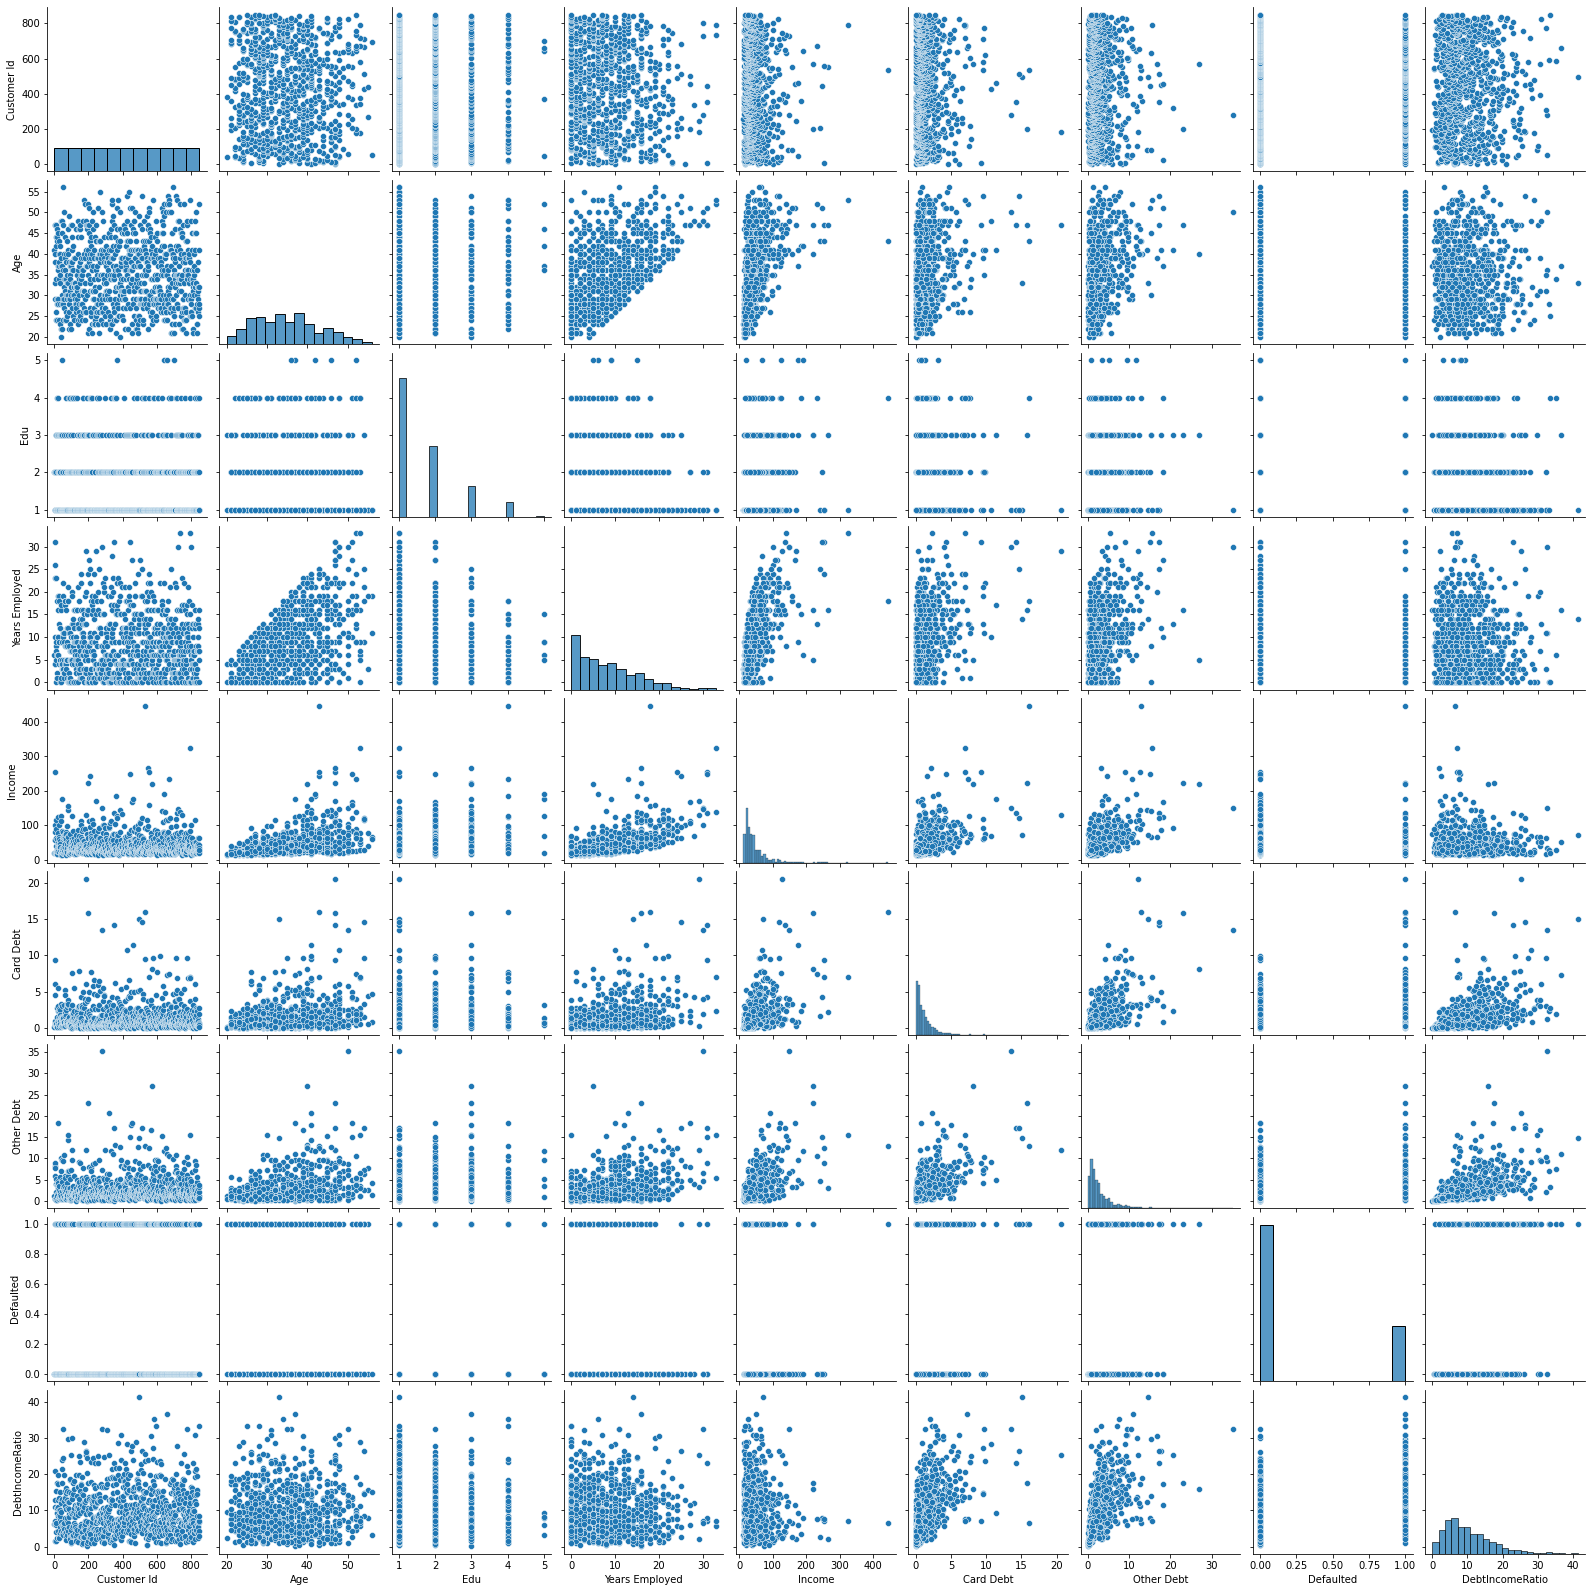

In [71]:
# Pairplot
sns.pairplot(customer)

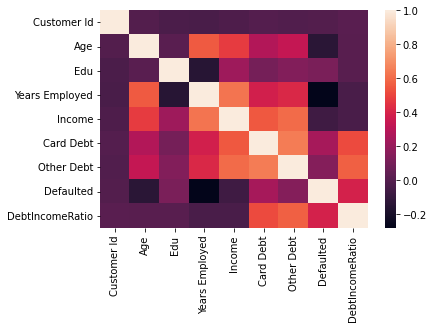

In [72]:
# Heatmap
sns.heatmap(customer.corr())

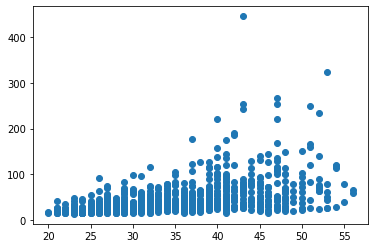

In [73]:
# Scatter plot
plt.scatter(customer['Age'], customer['Income'])

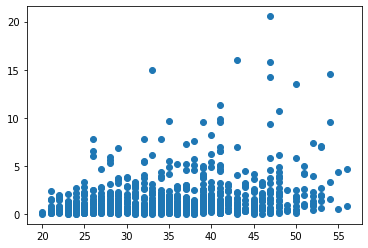

In [74]:
# Scatter plot
plt.scatter(customer['Age'], customer['Card Debt'])

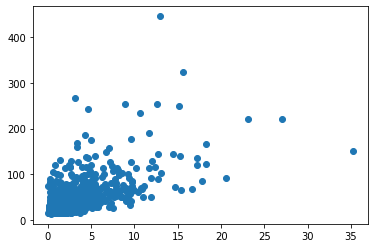

In [75]:
# Scatter plot
plt.scatter(customer['Other Debt'], customer['Income'])

#  Modelling

## Data Preprocessing

In [76]:
# Instantiate the Simple Imputer
mean_imputer = SimpleImputer(strategy='mean')

# Fit the mean imputer
mean_imputer_customer = mean_imputer.fit_transform(customer)

# Instantiate Standard Scaler
scaler = StandardScaler()

# Fit the scaler
customer_scaled = scaler.fit_transform(customer)

# make a pipeline
preprocessor = Pipeline(
    steps=(['Simple Imputer', mean_imputer], ['Standard Scaler', scaler])
)

### KMeans Clustering

In [77]:
# Import the model
from sklearn.cluster import KMeans

# Instantiate the model
kmeans = KMeans()

In [78]:
# Make a pipeline
kmeans_pipe = Pipeline(
    steps=(['preprocessor', preprocessor], ['KMeans Clustering', kmeans])
)

# Fit the model
kmeans_pipe.fit(customer_scaled)

Pipeline(steps=[('preprocessor',
                 Pipeline(steps=[('Simple Imputer', SimpleImputer()),
                                 ['Standard Scaler', StandardScaler()]])),
                ['KMeans Clustering', KMeans()]])

In [79]:
# Make predictions
kmeans_predictions = kmeans_pipe.predict(customer_scaled)

In [80]:
# Make a cluster column
customer['cluster'] = kmeans_predictions

Text(0.5, 1.0, 'Customer Clustering Based on Debt and Income')

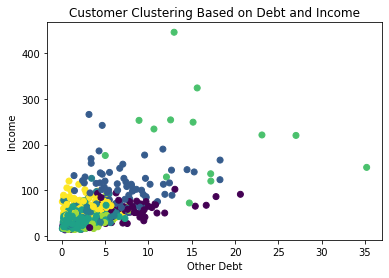

In [81]:
# Scatter plot
plt.scatter(customer['Other Debt'], customer['Income'], c=customer['cluster'])
plt.xlabel('Other Debt')
plt.ylabel('Income')
plt.title('Customer Clustering Based on Debt and Income')

cluster
0    36.426471
1    30.699387
2    44.191176
3    33.453488
4    31.981928
5    46.285714
6    31.356589
7    41.089744
Name: Age, dtype: float64
<BarContainer object of 850 artists>
cluster
0    1.985294
1    1.312883
2    2.073529
3    3.511628
4    1.283133
5    1.928571
6    1.651163
7    1.339744
Name: Edu, dtype: float64
<BarContainer object of 850 artists>
cluster
0     9.867647
1     5.208589
2    19.000000
3     4.744186
4     6.168675
5    22.642857
6     3.534884
7    14.512821
Name: Years Employed, dtype: float64
<BarContainer object of 850 artists>
cluster
0     53.529412
1     27.085890
2    112.485294
3     40.906977
4     31.246988
5    213.142857
6     28.007752
7     55.564103
Name: Income, dtype: float64
<BarContainer object of 850 artists>
cluster
0     4.382338
1     0.618331
2     2.869206
3     1.055837
4     0.829054
5    11.737786
6     1.166512
7     1.302372
Name: Card Debt, dtype: float64
<BarContainer object of 850 artists>
cluster
0     7.429632
1 

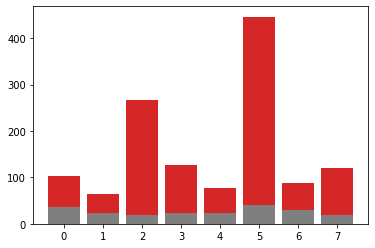

In [87]:
# Group the dataframe based on cluster\
columns_list = ['Age', 'Edu', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', 'Defaulted', 'DebtIncomeRatio']
for item in columns_list:
  print(customer.groupby(by=['cluster'])[item].mean())

<BarContainer object of 850 artists>

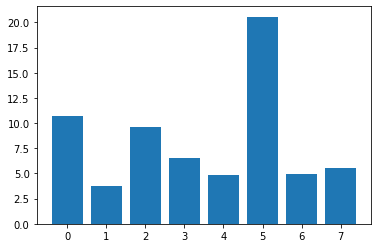

In [92]:
# Trend visualization
plt.bar(customer['cluster'], height=customer['Card Debt'])

<BarContainer object of 850 artists>

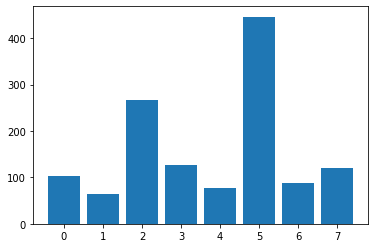

In [91]:
plt.bar(customer['cluster'], height=customer['Income'])

<BarContainer object of 850 artists>

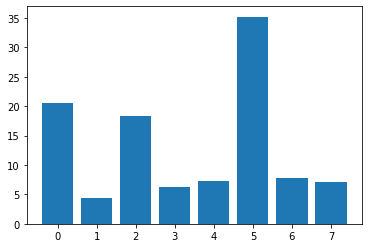

In [93]:
plt.bar(customer['cluster'], height=customer['Other Debt'])